Importing libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px

In [ ]:
df=pd.read_csv("/content/heart (1).csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Meta information about Dataframe

In [ ]:
print(f"number of rows:--> {df.shape[0]} and number of columns:--> {df.shape[1]}")

number of rows:--> 918 and number of columns:--> 12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Missing values and Duplicate rows

In [ ]:
def checking_m(df):
    null_v = df.isnull().sum().sort_values(ascending=False)
    null_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    null_v = pd.concat([null_v, null_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return null_v

checking_m(df)

,Missing_Number,Missing_Percent
HeartDisease,0,0.0
ST_Slope,0,0.0
Oldpeak,0,0.0
ExerciseAngina,0,0.0
MaxHR,0,0.0
RestingECG,0,0.0
FastingBS,0,0.0
Cholesterol,0,0.0
RestingBP,0,0.0
ChestPainType,0,0.0


In [ ]:
# No missing values

In [ ]:
print("Numbers of duplicated rows :",df.duplicated().sum())

Numbers of duplicated rows : 0


 Statistical information of Dataframe
 

In [ ]:
#check data description
df.describe().T.style.bar(subset=['mean'], color='#205ff2').background_gradient(subset=['std'], cmap='Reds').background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000
HeartDisease,918.000000,0.553377,0.497414,0.000000,0.000000,1.000000,1.000000,1.000000


In [ ]:
#check the correlation between target variable and each of the columns
df.corr()["HeartDisease"]

Age             0.282039
RestingBP       0.107589
Cholesterol    -0.232741
FastingBS       0.267291
MaxHR          -0.400421
Oldpeak         0.403951
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

Visualize correlation of independent features and checking multicolinarity problems

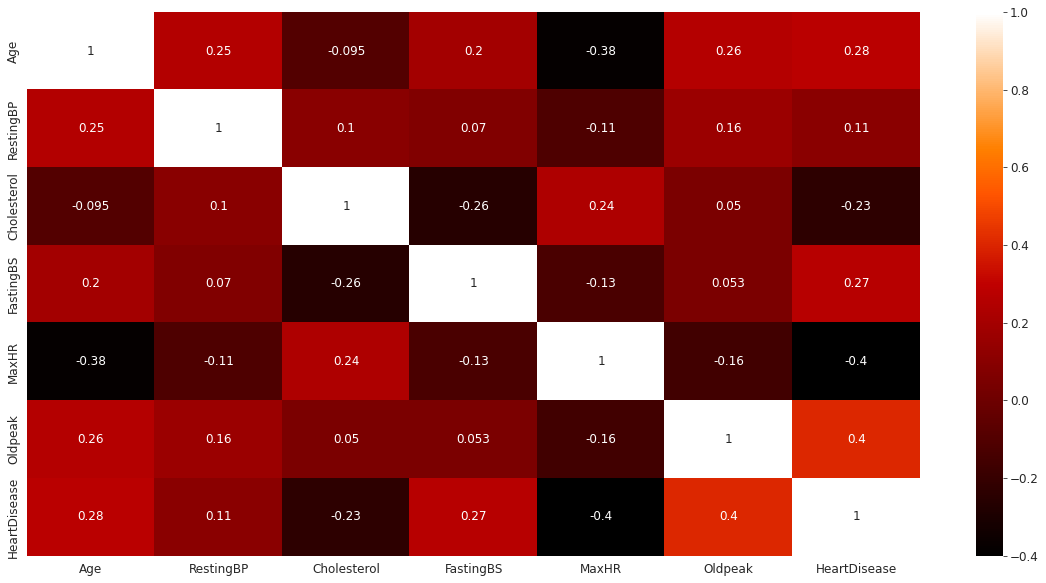

In [ ]:

plt.figure(figsize=(20,10))

#plot heat map
sns.heatmap(df.corr(),annot=True,cmap="gist_heat")

In [ ]:
#with the function we can select highly correlated  independent features 
#it will remove the first feature that is correlated with anything other feature 
def correlation(df,threshold):
    coll_corr=set() #set of all the names of correlated columns 
    corr_matrix=df.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname=corr_matrix.columns[i] #getting the name of columns
                coll_corr.add(colname)
    return coll_corr 

In [ ]:
#calling the fuction
corr_feature = correlation(df.iloc[:,:-1],0.85)
len(set(corr_feature))

0

In [ ]:
# No highly correalted features or multicolinarity problems

In [ ]:
#getting the categorical and numerical columns from df
numeric_col=[col for col in df if df[col].dtype !="object" ]
categorical_col=[col for col in df if df[col].dtype=="object" ]
numeric_col.remove("HeartDisease")
print("Numerical col:",numeric_col)
print("Categrical col:",categorical_col)

Numerical col: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
Categrical col: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


Find Outliers

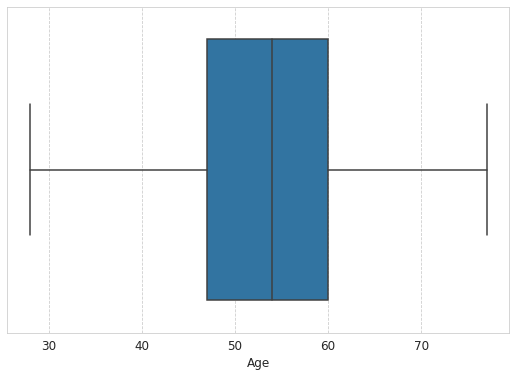

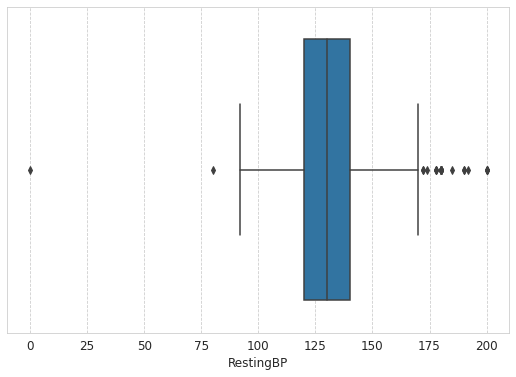

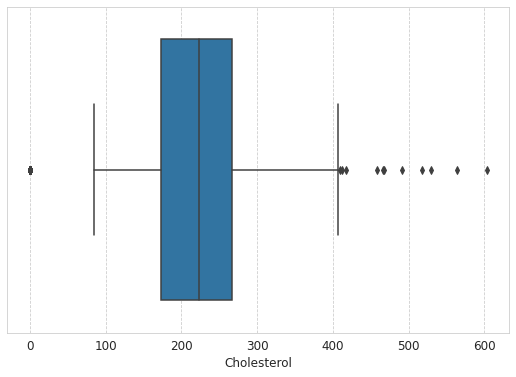

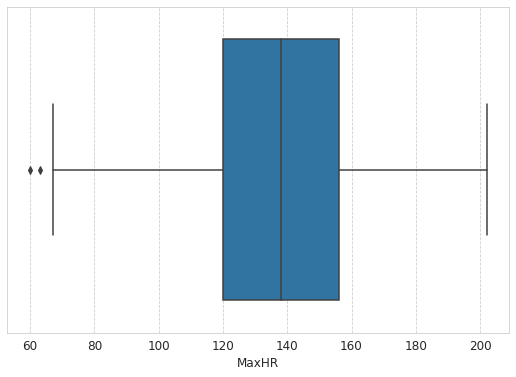

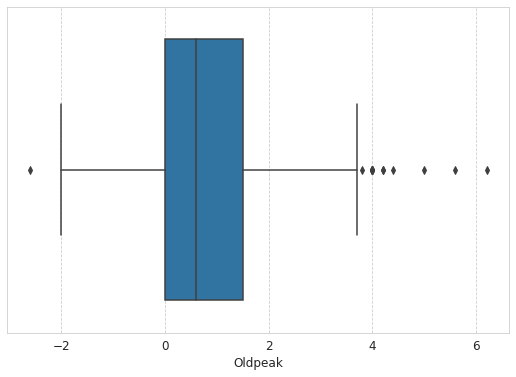

In [ ]:
col=['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
for c in col:
    fig=plt.figure(figsize=(9,6))
    sns.boxplot(x=df[c],hue=df.HeartDisease)

Removing Outliers Using IQR


In [ ]:
#Arrange the data in increasing order
sorted(col)

['Age', 'Cholesterol', 'MaxHR', 'Oldpeak', 'RestingBP']

In [ ]:
q1, q3= np.percentile(df['RestingBP'],[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print("lower_bound",lower_bound)
print("upper_bound",upper_bound)

lower_bound 90.0
upper_bound 170.0


In [ ]:
df = df[(df['RestingBP']>=90) & (df['RestingBP']<=170)]

In [ ]:
q1, q3= np.percentile(df['Oldpeak'],[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print("lower_bound",lower_bound)
print("upper_bound",upper_bound)

lower_bound -2.25
upper_bound 3.75


In [ ]:
df = df[(df['Oldpeak']>=-2) & (df['Oldpeak']<=3)]

In [ ]:
q1, q3= np.percentile(df['MaxHR'],[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print("lower_bound",lower_bound)
print("upper_bound",upper_bound)

lower_bound 66.0
upper_bound 210.0


In [ ]:
df = df[(df['MaxHR']>=66) & (df['MaxHR']<=210)]

In [ ]:
q1, q3= np.percentile(df['Cholesterol'],[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print("lower_bound",lower_bound)
print("upper_bound",upper_bound)

lower_bound 38.125
upper_bound 401.125


In [ ]:
df = df[(df['Cholesterol']>=38) & (df['Cholesterol']<=401)]

# Data Visualization

In [ ]:
fig = px.histogram(df, 'Age',             
                   color="HeartDisease",histfunc="count",
                   title="<b>Age vs HeartDisease</b>")

fig.show()

From this plot we can note that heart disease is more prominent over people who's age range between 55 and 65

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


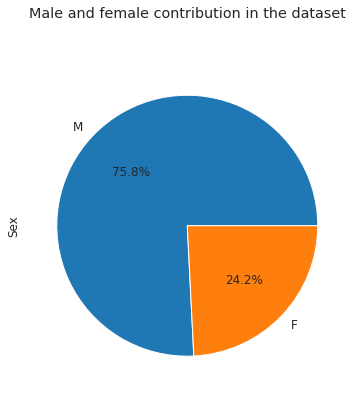

In [ ]:
sex=df.Sex.value_counts()
sex.plot(kind='pie',figsize=(15,6),autopct='%1.1f%%')
plt.title('Male and female contribution in the dataset', y=1.12) 
plt.show()

Note that the dataset is biased due to the unequal contribution wrt gender

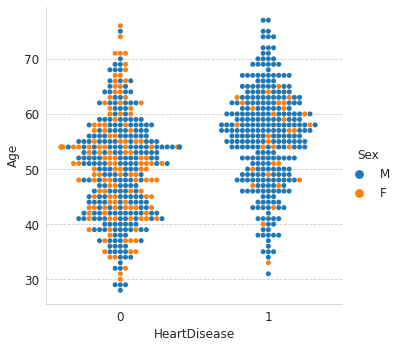

In [ ]:
sns.catplot(data=df, x="HeartDisease", y="Age", kind="swarm", hue="Sex")

Implies that males are more likely prone to heart disease especially in the age range of 50-60

In [ ]:
ChestPainType = df.ChestPainType.value_counts()

fig = px.pie(ChestPainType, 
             values = ChestPainType.values, 
             names = ChestPainType.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.update_layout(title_text='Chest Pain types')
fig.show()

Gives an overview of types and percentage of chest pains which contribute to the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



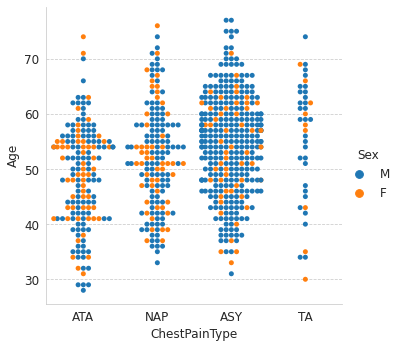

In [ ]:
sns.catplot(data=df, x="ChestPainType", y="Age", kind="swarm", hue="Sex")

Gives and insight into what types of chest pain is more prominent among people.

Also note that males get an unsual amount of ASY type of chest pain

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



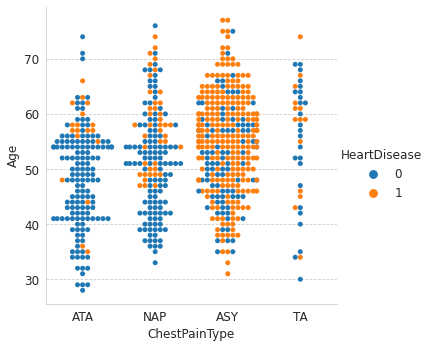

In [ ]:
sns.catplot(data=df, x="ChestPainType", y="Age", kind="swarm", hue="HeartDisease")

People with ASY type of chest pain have a high chance of getting a heart disease and a large portion of it lies in the age range above 50

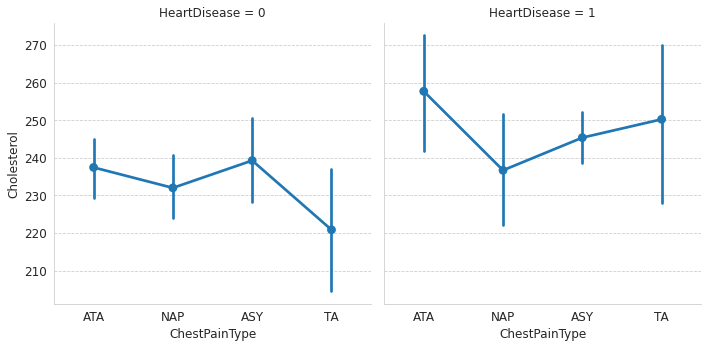

In [ ]:
sns.catplot(data = df , x ="ChestPainType"  , y ="Cholesterol", kind="point" , col ="HeartDisease" , ci =95)

Significant high cholestorel levels in people with heart disease and note that there is a high difference in avg cholestorel level in different types of chest pain

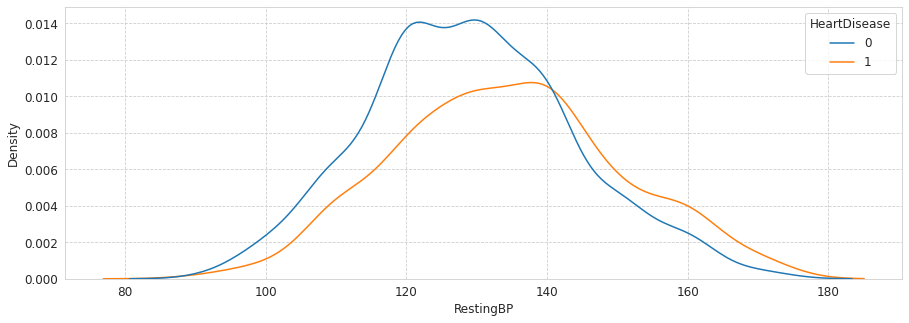

In [ ]:
plt.figure(figsize=(15,5))
sns.kdeplot(df['RestingBP'],hue=df['HeartDisease'])
plt.show()

Plot of density vs RestingBP

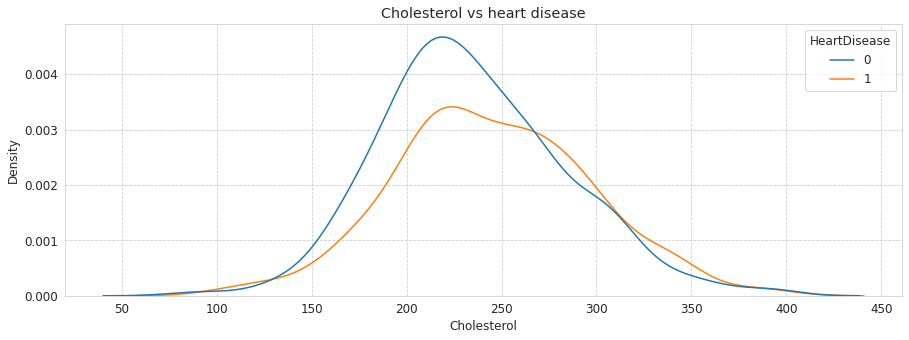

In [ ]:
plt.figure(figsize=(15,5))
sns.kdeplot(df['Cholesterol'],hue=df['HeartDisease'])
plt.title("Cholesterol vs heart disease")
plt.show()

Plot of density vs Cholesterol

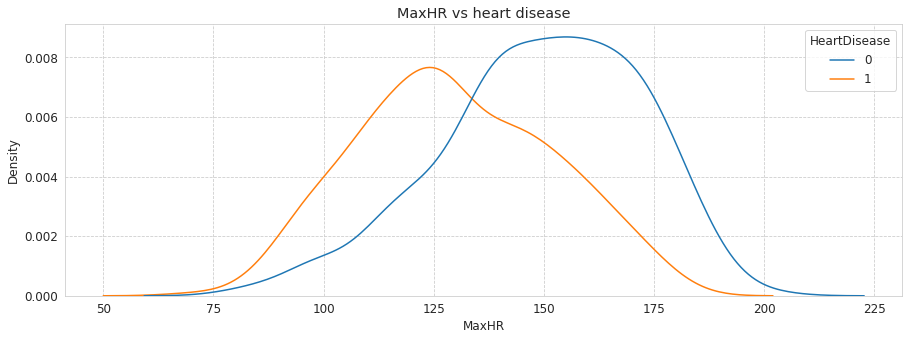

In [ ]:
plt.figure(figsize=(15,5))
sns.kdeplot(df['MaxHR'],hue=df['HeartDisease'])
plt.title("MaxHR vs heart disease")
plt.show()

People with lower MaxHR (i.e in range of 100-150) are more likely to get heart disease

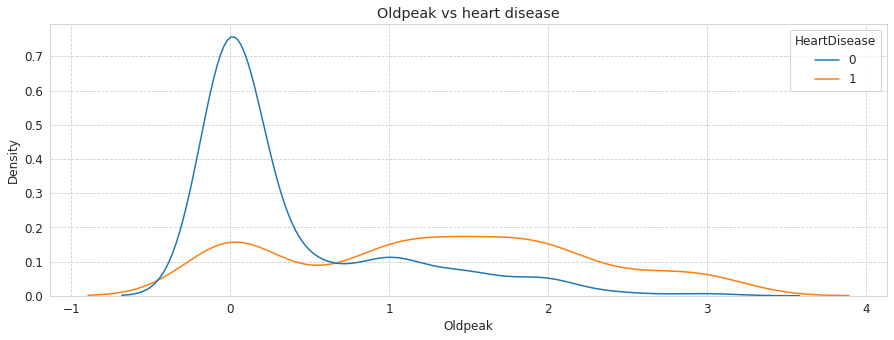

In [ ]:
plt.figure(figsize=(15,5))
sns.kdeplot(df['Oldpeak'],hue=df['HeartDisease'])
plt.title("Oldpeak vs heart disease")
plt.show()

Above plot says heart disease is affects the older people whose age is ranging between 55 and 65

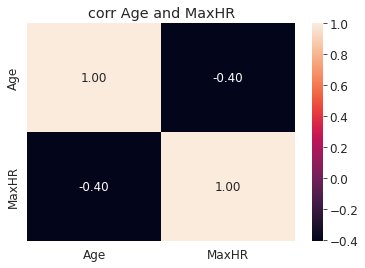

In [ ]:
sns.heatmap(df[["Age" , "MaxHR"]].corr(), annot=True , fmt =".2f")
plt.title("corr Age and MaxHR")
plt.show()

The heart rate and age seem to be negatively correlated

In [ ]:
fig = px.histogram(data_frame = df,
             x = "ExerciseAngina",
             color="HeartDisease", title="<b>ExerciseAngina vs HeartDisease</b>",
             template='plotly_dark', width=500,height=300)
fig.show()

Gives a count of people with heart disease while dividing wrt ExerciseAngina

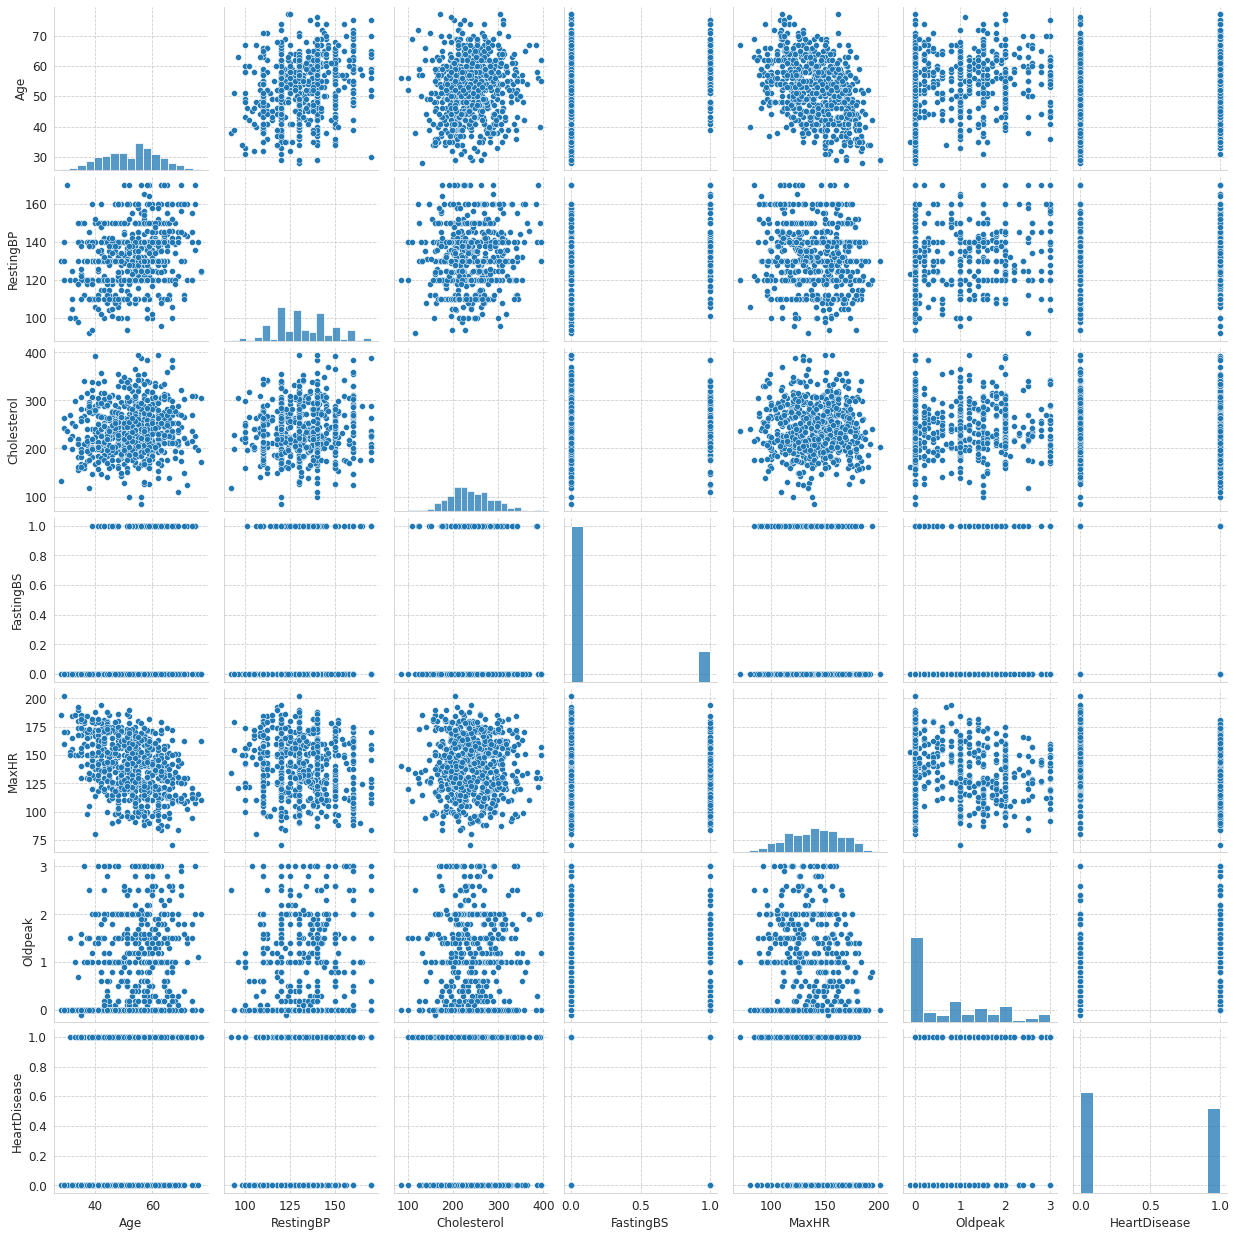

In [ ]:
sns.pairplot(df)

Correlation of every attribute with each other.

In [ ]:
pip install graphviz

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn import tree
import graphviz

In [ ]:
X=df.iloc[:,0:-1]
y=df.HeartDisease

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print("X_train shape: ",x_train.shape)
print("X_test shape: ",x_test.shape)
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)

X_train shape:  (483, 11)
X_test shape:  (207, 11)
Y_train shape:  (483,)
Y_test shape:  (207,)


Columns names:  Index(['Oldpeak'], dtype='object')


skewed value:--->> Oldpeak    0.879215
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



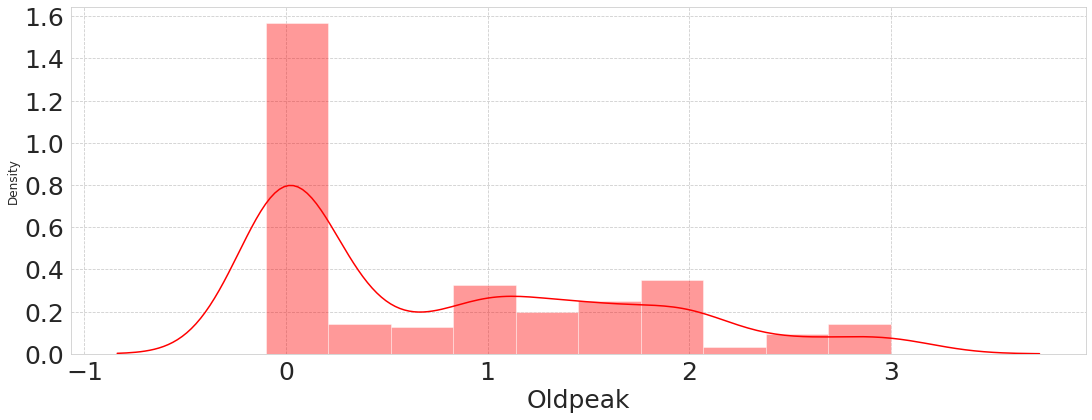

In [ ]:
skew_limit=0.75 # limit for skewed col
skew_vals=x_train[numeric_col].drop('FastingBS', axis=1).skew()
skew_col=skew_vals[abs(skew_vals)>skew_limit].sort_values(ascending =False)

#graphically represent the skewed col
i=1    
print("Columns names: ",skew_col.index)
print("\n")
print("skewed value:--->>",skew_col)
plt.figure(figsize=(40,60))
for col in skew_col.index:
    plt.subplot(8,2,i)
    sns.distplot(X[col],color="r")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    i=i+1
        

plt.show()

In [ ]:
#fix the skewness using function transformer
pt=PowerTransformer(standardize=False)
#ft=FunctionTransformer(func=np.log1p)
skew=["Oldpeak"]
x_train[skew]=pt.fit_transform(x_train[skew])
x_test[skew]=pt.transform(x_test[skew])

In [ ]:
x_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
191,50,M,ATA,170,209,0,ST,116,N,-0.000000,Up
283,55,F,ATA,110,344,0,ST,160,N,-0.000000,Up
547,61,M,TA,142,200,1,ST,100,N,0.631477,Down
740,54,F,NAP,160,201,0,Normal,163,N,-0.000000,Up
608,62,M,ASY,158,170,0,ST,138,Y,-0.000000,Flat


In [ ]:
#Encoding the categorical columns into numerical columns 
x_train=pd.get_dummies(x_train,columns=categorical_col,drop_first=True) #using pandas function
x_test=pd.get_dummies(x_test,columns=categorical_col,drop_first=True)
print("shape:",x_train.shape)
print()
x_train.head()

shape: (483, 15)



,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
191,50,170,209,0,116,-0.000000,1,1,0,0,0,1,0,0,1
283,55,110,344,0,160,-0.000000,0,1,0,0,0,1,0,0,1
547,61,142,200,1,100,0.631477,1,0,0,1,0,1,0,0,0
740,54,160,201,0,163,-0.000000,0,0,1,0,1,0,0,0,1
608,62,158,170,0,138,-0.000000,1,0,0,0,0,1,1,1,0


In [ ]:
# Using standard scaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

x_train = pd.DataFrame(x_train_scaled, columns = x_train.columns[:])
x_test = pd.DataFrame(x_test_scaled, columns = x_test.columns[:])
x_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-0.251795,2.556348,-0.635315,-0.445546,-1.008274,-0.978874,0.590899,1.729663,-0.539855,-0.243332,-1.189538,2.227771,-0.720325,-0.977479,1.035838
1,0.290170,-1.346453,2.039555,-0.445546,0.788911,-0.978874,-1.692336,1.729663,-0.539855,-0.243332,-1.189538,2.227771,-0.720325,-0.977479,1.035838
2,0.940529,0.735041,-0.813640,2.244438,-1.661796,1.061421,0.590899,-0.578147,-0.539855,4.109609,-1.189538,2.227771,-0.720325,-0.977479,-0.965401
3,0.181777,1.905881,-0.793826,-0.445546,0.911447,-0.978874,-1.692336,-0.578147,1.852348,-0.243332,0.840663,-0.448879,-0.720325,-0.977479,1.035838
4,1.048923,1.775788,-1.408055,-0.445546,-0.109681,-0.978874,0.590899,-0.578147,-0.539855,-0.243332,-1.189538,2.227771,1.388262,1.023040,-0.965401


In [ ]:
#code for KNN model
Knn_model = KNeighborsClassifier(n_neighbors=7)
Knn_model.fit(x_train,y_train)
y_pred = Knn_model.predict(x_test)
score_Knn = Knn_model.score(x_test,y_test)
print('Accuracy score of KNN model')
print(accuracy_score(y_test,y_pred))
print('Classification report of KNN model')
print(classification_report(y_test,y_pred))
print('Confusion Matrix of KNN model')
print(confusion_matrix(y_test,y_pred))


Accuracy score of KNN model
0.893719806763285
Classification report of KNN model
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       103
           1       0.89      0.89      0.89       104

    accuracy                           0.89       207
   macro avg       0.89      0.89      0.89       207
weighted avg       0.89      0.89      0.89       207

Confusion Matrix of KNN model
[[92 11]
 [11 93]]


In [ ]:
max_k = 20
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(x_train, y_train)
    
    y_pred = knn.predict(x_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



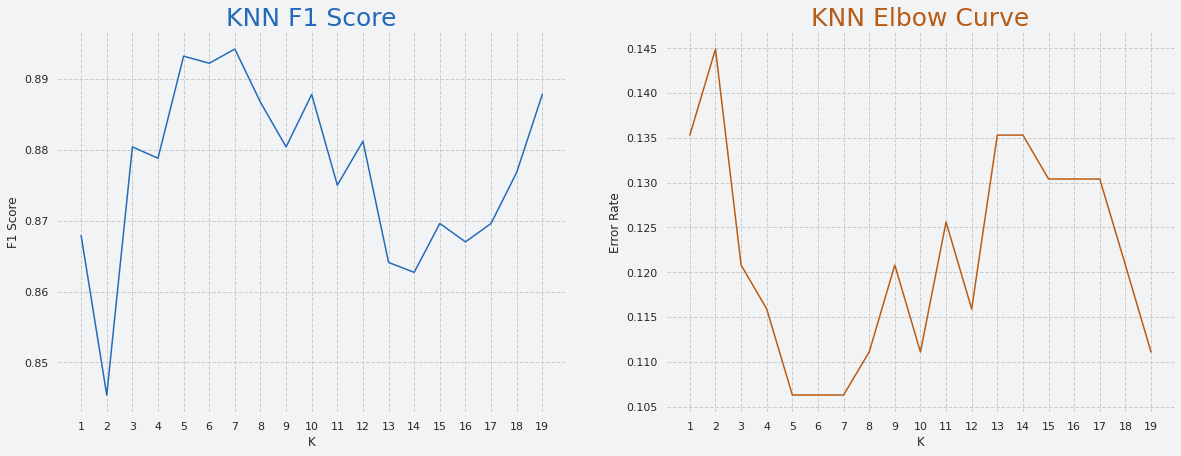

In [ ]:
mpl.rcParams['font.size'] = 12
sns.set_style("whitegrid", {'grid.linestyle': '--'})  # set grid
mpl.rcParams['font.sans-serif'] = ['AppleGothic']

fig, (ax_f1, ax_error) = plt.subplots(1, 2, figsize=(20, 7))

fig.patch.set_facecolor('#F1F3F4')
ax_f1.patch.set_facecolor('#F1F3F4')
ax_error.patch.set_facecolor('#F1F3F4')

sns.lineplot(f1_results['K'], f1_results['F1 Score'], color = '#236AB9', ax=ax_f1)
sns.lineplot(error_results['K'], error_results['Error Rate'], color='#B85B14', ax=ax_error)

ax_f1.set_title('KNN F1 Score', color='#236AB9', fontsize= 25)
ax_error.set_title('KNN Elbow Curve', color='#B85B14', fontsize= 25)

# Set xticks range
ax_f1.set_xticks(range(1,20))
ax_error.set_xticks(range(1,20))

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax_f1.spines[i].set_visible(False)

for i in ['top', 'bottom', 'left', 'right']:
    ax_error.spines[i].set_visible(False)

In [ ]:
#code for Decision Tree model
Dtree_model = DecisionTreeClassifier(criterion='gini',max_depth=5,max_features='auto')
Dtree_model.fit(x_train,y_train)
y_train_pred = Dtree_model.predict(x_train)
y_test_pred = Dtree_model.predict(x_test)
score_dtree = Dtree_model.score(x_test,y_test)
print('Accuracy score of Decision Tree model during testing ')
print(accuracy_score(y_test,y_test_pred))


Accuracy score of Decision Tree model during testing
0.7777777777777778


In [ ]:
print('Accuracy score of Decision Tree model during training before pruning')
print(accuracy_score(y_train,y_train_pred))

Accuracy score of Decision Tree model during training before pruning
0.8778467908902692


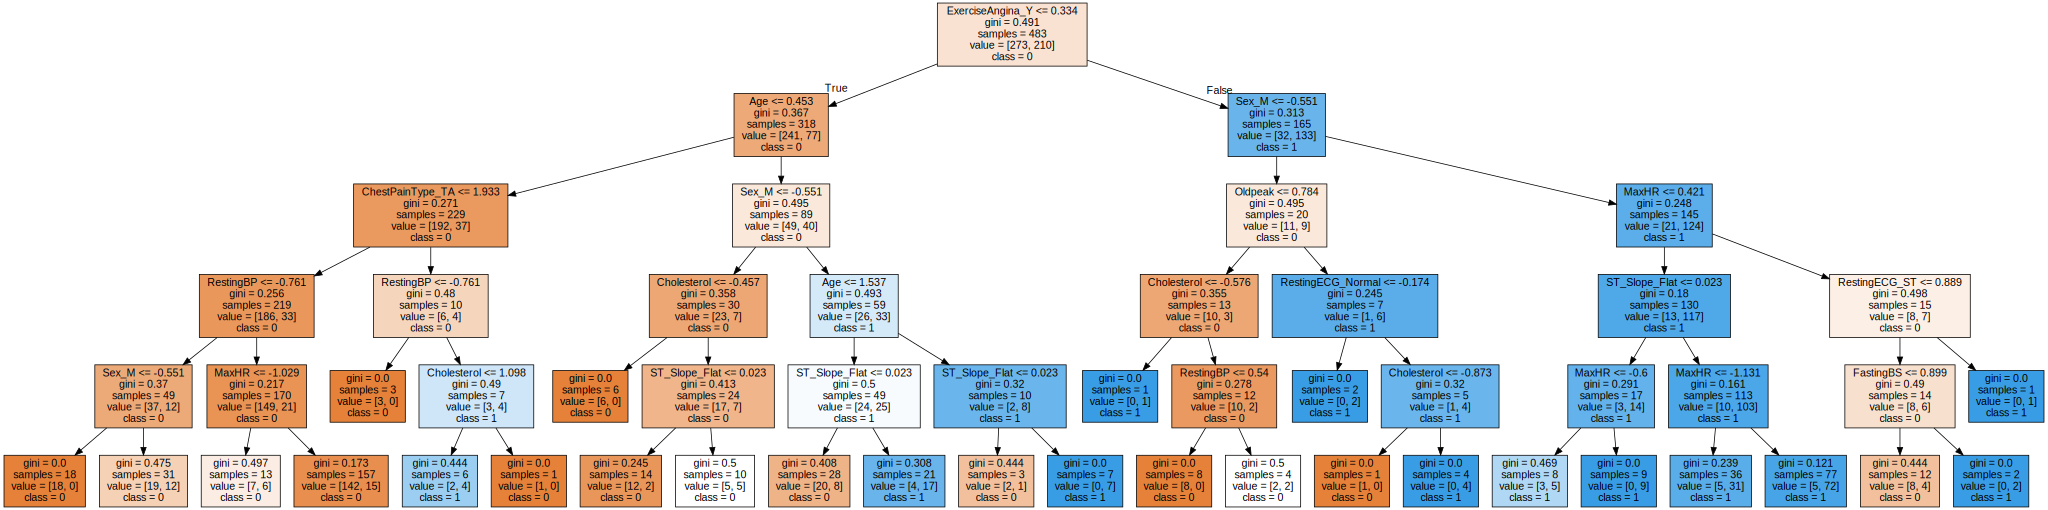

In [ ]:
dot_data = tree.export_graphviz(Dtree_model, out_file=None, 
                                feature_names=x_train.columns,
                                class_names=['0','1'],
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
graph.render("decision_tree_graphivz_before_pruning")

'decision_tree_graphivz_before_pruning.png'

In [ ]:
path =  Dtree_model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path['ccp_alphas']

ccp_alphas

array([0.        , 0.00032042, 0.00036166, 0.0010867 , 0.00112931,
       0.00138026, 0.00238588, 0.00334023, 0.00338164, 0.00350621,
       0.00422978, 0.00513473, 0.00521912, 0.00679617, 0.00794311,
       0.0113966 , 0.01156947, 0.01212136, 0.03824896, 0.07527644])

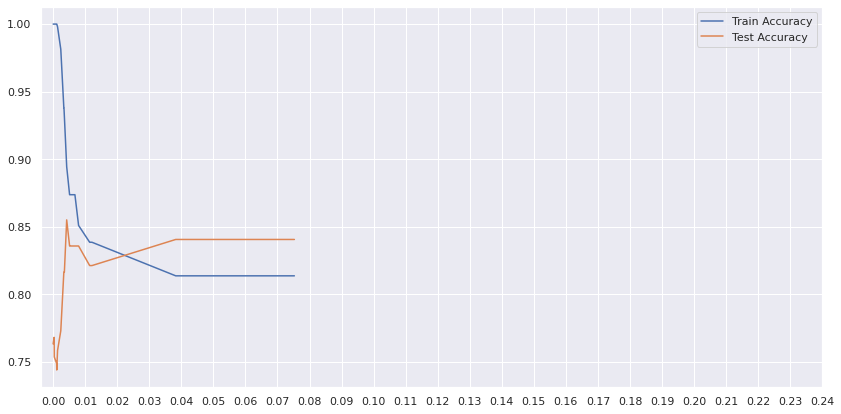

In [ ]:
accuracy_train,accuracy_test = [],[]

for i in ccp_alphas:
  tree_1 = DecisionTreeClassifier(ccp_alpha = i)

  tree_1.fit(x_train,y_train)
  y_train_pred =  tree_1.predict(x_train)
  y_test_pred = tree_1.predict(x_test)

  accuracy_train.append(accuracy_score(y_train,y_train_pred))
  accuracy_test.append(accuracy_score(y_test,y_test_pred))

sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=ccp_alphas,label="Train Accuracy")
sns.lineplot(y=accuracy_test,x=ccp_alphas,label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()

In [ ]:
tree_1 = DecisionTreeClassifier(ccp_alpha=0.065,random_state=40)
tree_1.fit(x_train,y_train)
y_train_pred = tree_1.predict(x_train)
y_test_pred = tree_1.predict(x_test)

print('Accuracy score of Decision Tree model during training after pruning')
print(accuracy_score(y_train,y_train_pred))
print('Accuracy score of Decision Tree model during testing after pruning')
print(accuracy_score(y_test,y_test_pred))
print('Classification report of Decision Tree model')
print(classification_report(y_test,y_pred))
print('Confusion Matrix of Decision Tree model')
print(confusion_matrix(y_test,y_pred))

Accuracy score of Decision Tree model during training after pruning
0.8136645962732919
Accuracy score of Decision Tree model during testing after pruning
0.8405797101449275
Classification report of Decision Tree model
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       103
           1       0.90      0.88      0.89       104

    accuracy                           0.89       207
   macro avg       0.89      0.89      0.89       207
weighted avg       0.89      0.89      0.89       207

Confusion Matrix of Decision Tree model
[[93 10]
 [13 91]]


In [ ]:
from sklearn import tree

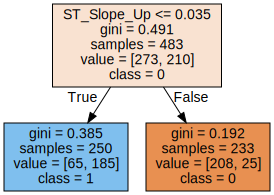

In [ ]:
dot_data = tree.export_graphviz(tree_1, out_file=None, 
                                feature_names=x_train.columns,
                                class_names=['0','1'],
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
graph.render("decision_tree_graphivz_after_pruning")

'decision_tree_graphivz_after_pruning.png'

In [ ]:
plt.savefig("K vs error rate and k vs f1 score.jpg")